# **Class Project**: SFC PayGo Solar Credit Repayment 
### *Import Packages and Data*

In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import missingno as msno

### *Load and Clean Data*

In [4]:
train = pd.read_csv("Train.csv")
train.head()

# m1 - m6 are hypothetical payments to train the model

,ID,TransactionDates,PaymentsHistory,m1,m2,m3,m4,m5,m6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [5]:
test = pd.read_csv("Test.csv")
test.head()

# data to be used as an input to generate predictions

,ID,TransactionDates,PaymentsHistory
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."


In [7]:
meta = pd.read_csv("metadata.csv")
meta.head()

# customer metadata

/var/folders/lm/0r0nc22j6nzf5mqffy561bj80000gn/T/ipykernel_1713/3658077302.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv("metadata.csv")


,ID,RegistrationDate,Deposit,UpsellDate,AccessoryRate,PaymentMethod,rateTypeEntity,RatePerUnit,DaysOnDeposit,MainApplicantGender,Age,Region,Town,Occupation,SupplierName,Term,TotalContractValue,ExpectedTermDate,FirstPaymentDate,LastPaymentDate
0,ID_K00S4N4,2015-12-10 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [6]:
# renaming columns

train = train.rename(
    columns={"ID":"contract_id",
             "TransactionDates":"transaction_dates",
             "PaymentsHistory":"payments_history",
             "m1":"month_1",
             "m2":"month_2",
             "m3":"month_3",
             "m4":"month_4",
             "m5":"month_5",
             "m6":"month_6"})
train.head()

,contract_id,transaction_dates,payments_history,month_1,month_2,month_3,month_4,month_5,month_6
0,ID_MR53LEX,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"['04-2018', '05-2018', '06-2018', '07-2018', '...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"['02-2020', '03-2020', '04-2020', '05-2020', '...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"['09-2017', '10-2017', '11-2017', '12-2017', '...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [8]:
test = test.rename(
    columns={"ID":"contract_id",
             "TransactionDates":"transaction_dates",
             "PaymentsHistory":"payments_history"})
test.head()

,contract_id,transaction_dates,payments_history
0,ID_6L67PAA,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"['12-2015', '01-2016', '03-2016', '05-2016', '...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"['12-2015', '01-2016', '02-2016', '03-2016', '...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."


In [9]:
# I'm not sure if we even need all these columns

meta = meta.rename(
    columns={"ID": "contract_id", 
             "RegistrationDate":"registration_date", 
             "Deposit":"deposit", 
             "UpsellDate":"upsell_date", 
             "AccessoryRate":"accessory_rate", 
             "PaymentMethod":"payment_method",
             "rateTypeEntity":"rate_type_entity",
             "RatePerUnit":"rate_per_unit",
             "DaysOnDeposit":"days_on_deposit",
             "MainApplicantGender":"gender",
             "Age":"age",
             "Region":"region",
             "Town":"town",
             "Occupation":"occupation",
             "SupplierName":"supplier",
             "Term":"term",
             "TotalContractValue":"contract_value",
             "ExpectedTermDate":"expected_term_date",
             "FirstPaymentDate":"first_payment_date",
             "LastPaymentDate":"last_payment_date"})

meta.head()

,contract_id,registration_date,deposit,upsell_date,accessory_rate,payment_method,rate_type_entity,rate_per_unit,days_on_deposit,gender,age,region,town,occupation,supplier,term,contract_value,expected_term_date,first_payment_date,last_payment_date
0,ID_K00S4N4,2015-12-10 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,2018-03-29 10:14:58,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,NaN,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [10]:
# look at other parameters (types and shapes)

print("Train data types:\n", train.dtypes)
print("Shape:\t", train.shape)
print("\nTest data types:\n", test.dtypes)
print("Shape:\t", test.shape)
print("\nMetadata types:\n", meta.dtypes)
print("Shape:\t", meta.shape)

Train data types:
 contract_id           object
transaction_dates     object
payments_history      object
month_1              float64
month_2              float64
month_3              float64
month_4              float64
month_5              float64
month_6              float64
dtype: object
Shape:	 (28007, 9)

Test data types:
 contract_id          object
transaction_dates    object
payments_history     object
dtype: object
Shape:	 (9336, 3)

Metadata types:
 contract_id            object
registration_date      object
deposit                 int64
upsell_date            object
accessory_rate        float64
payment_method         object
rate_type_entity       object
rate_per_unit           int64
days_on_deposit         int64
gender                 object
age                   float64
region                 object
town                   object
occupation             object
supplier               object
term                    int64
contract_value        float64
expected_term_date     o

In [11]:
# change transaction_dates entries (strings) to dates
new_transaction_col = []

# e is a single entry (row)
for e in train.transaction_dates:
  e_new = []
  e = e.replace("[", "")
  e = e.replace("]", "")
  e = e.replace("'", "")
  e = e.replace(" ", "")
  dates = e.split(",")

  # d is a single date listed
  for d in dates:
    e_new.append(datetime.strptime(d, "%m-%Y"))
  new_transaction_col.append(e_new)

train["transaction_dates"] = new_transaction_col

In [12]:

train.head()

,contract_id,transaction_dates,payments_history,month_1,month_2,month_3,month_4,month_5,month_6
0,ID_MR53LEX,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"[2020-02-01 00:00:00, 2020-03-01 00:00:00, 202...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [13]:
# changing payments_history entries (strings) to numbers
new_history_col = []

# e is a single entry (row)
for e in train.payments_history:
  e_new = []
  e = e.replace("[", "")
  e = e.replace("]", "")
  e = e.replace(" ", "")
  payments = e.split(",")

  # p is a single payment listed
  for p in payments:
    e_new.append(float(p))
  new_history_col.append(e_new)

train["payments_history"] = new_history_col

In [14]:
train.head()

,contract_id,transaction_dates,payments_history,month_1,month_2,month_3,month_4,month_5,month_6
0,ID_MR53LEX,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0
1,ID_3D7NQUH,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0
2,ID_0IWQNPI,"[2020-02-01 00:00:00, 2020-03-01 00:00:00, 202...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0
3,ID_IY8SYB9,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0
4,ID_9XHL7VZ,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0


In [15]:
# repeat with test data

# changing transaction dates entries (strings) to dates
new_transaction_col = []

# e is a single entry (row)
for e in test.transaction_dates:
  e_new = []
  e = e.replace("[", "")
  e = e.replace("]", "")
  e = e.replace("'", "")
  e = e.replace(" ", "")
  dates = e.split(",")

  # d is a single date listed
  for d in dates:
    e_new.append(datetime.strptime(d, "%m-%Y"))
  new_transaction_col.append(e_new)

test["transaction_dates"] = new_transaction_col

In [16]:

# changing payments_history entries (strings) to numbers
new_history_col = []

# e is a single entry (row)
for e in test.payments_history:
  e_new = []
  e = e.replace("[", "")
  e = e.replace("]", "")
  e = e.replace(" ", "")
  payments = e.split(",")
  
  # p is a single payment listed
  for p in payments:
    e_new.append(float(p))
  new_history_col.append(e_new)

test["payments_history"] = new_history_col

In [17]:
test.head()

,contract_id,transaction_dates,payments_history
0,ID_6L67PAA,"[2015-12-01 00:00:00, 2016-01-01 00:00:00, 201...","[4000.0, 1050.0, 1050.0, 1050.0, 1050.0, 400.0]"
1,ID_VJ80SX2,"[2015-12-01 00:00:00, 2016-01-01 00:00:00, 201...","[3000.0, 850.0, 750.0, 1500.0, 650.0, 1250.0, ..."
2,ID_7OU9HLK,"[2015-12-01 00:00:00, 2016-01-01 00:00:00, 201...","[2400.0, 300.0, 500.0, 450.0, 675.0, 700.0, 87..."
3,ID_WVWTPGK,"[2015-12-01 00:00:00, 2016-01-01 00:00:00, 201...","[4700.0, 1200.0, 950.0, 1200.0, 900.0, 1110.0,..."
4,ID_04DSDQS,"[2015-12-01 00:00:00, 2016-01-01 00:00:00, 201...","[4800.0, 750.0, 995.0, 995.0, 1300.0, 750.0, 1..."


In [72]:
# changing registration_date entries (strings) to dates
meta.registration_date = pd.to_datetime(meta.registration_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [73]:
# change upsell_date entries (strings) to dates
meta.upsell_date = pd.to_datetime(meta.upsell_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [74]:
# change expected_term_date, first_payment_date, and last_payment_date entries (strings) to dates
meta.expected_term_date = pd.to_datetime(meta.expected_term_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")
meta.first_payment_date = pd.to_datetime(meta.first_payment_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")
meta.last_payment_date = pd.to_datetime(meta.last_payment_date, format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [80]:
# all the records are FINANCED (no need to make a category)
# meta.payment_method.nunique() returns 1
len(meta[meta.payment_method!="FINANCED"])

# all the records have the same supplier as well: d_light
# remove these columns
meta.drop(
    columns=['payment_method', 'supplier'],
    inplace=True
)

AttributeError: 'DataFrame' object has no attribute 'payment_method'

In [76]:
# meta.rate_type_entity.nunique() returns 3
meta.groupby(meta.rate_type_entity).count() # vast majority of payments are daily

# in any case, let's make this a categorical variable
meta.rate_type_entity = meta.rate_type_entity.astype('category')

# do the same for gender
meta.gender = meta.gender.astype('category')

In [77]:
# there are only 7 unique regions in the 30,000+ rows

# all contain the word 'region' which is redundant - let's remove it
meta.region = meta.region.str.replace("Region", "")

# now make this categorical as well
meta.region = meta.region.astype('category')

In [78]:
# there are only 7 unique occupations, so make this a category
meta.occupation = meta.occupation.astype('category')

In [79]:
meta.head()

,registration_date,deposit,upsell_date,accessory_rate,rate_type_entity,rate_per_unit,days_on_deposit,gender,age,region,town,occupation,term,contract_value,expected_term_date,first_payment_date,last_payment_date
contract_id,,,,,,,,,,,,,,,,,
ID_K00S4N4,2015-12-10,2000,NaT,0.0,DAILY,35,7,Male,41.0,Mount Kenya,Embu,Other,364,14740.0,2016-12-08,2015-12-10 09:52:35,2016-10-23 04:52:30
ID_6L67PAA,2015-12-09,2000,NaT,0.0,DAILY,35,7,Male,33.0,Coast,Kilifi,Other,364,14740.0,2016-12-07,2015-12-09 13:14:03,2020-05-24 15:32:18
ID_102CV85,2015-12-18,2000,2018-03-29 10:14:58,35.0,DAILY,35,7,Female,48.0,Nairobi,Makueni,Business,392,29480.0,2017-01-13,2015-12-18 06:22:34,2017-02-01 15:23:44
ID_HXBJFHB,2015-11-25,2000,NaT,0.0,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,364,14740.0,2016-11-23,2015-11-25 13:25:57,2017-05-22 16:46:54
ID_3K9VZ5J,2015-12-02,2000,NaT,0.0,DAILY,35,7,Female,56.0,Mount Kenya,Kirinyaga,Other,364,14740.0,2016-11-30,2015-12-05 10:34:32,2017-05-12 16:50:52


In [90]:
meta.nunique()

registration_date     37211
deposit                  11
upsell_date             188
accessory_rate           18
rate_type_entity          3
rate_per_unit            11
days_on_deposit           6
gender                    2
age                      83
region                    7
town                     48
occupation                7
term                     48
contract_value           33
expected_term_date    37206
first_payment_date    37279
last_payment_date     36231
dtype: int64

In [88]:
meta.isnull().sum()

registration_date         0
deposit                   0
upsell_date           36370
accessory_rate            0
rate_type_entity          0
rate_per_unit             0
days_on_deposit           0
gender                    0
age                    6939
region                 1934
town                      0
occupation                0
term                      0
contract_value            0
expected_term_date        0
first_payment_date        0
last_payment_date         0
dtype: int64

In [98]:
meta.isnull().sum()  /  meta.shape[0]

registration_date     0.000000
deposit               0.000000
upsell_date           0.973944
accessory_rate        0.000000
rate_type_entity      0.000000
rate_per_unit         0.000000
days_on_deposit       0.000000
gender                0.000000
age                   0.185818
region                0.051790
town                  0.000000
occupation            0.000000
term                  0.000000
contract_value        0.000000
expected_term_date    0.000000
first_payment_date    0.000000
last_payment_date     0.000000
dtype: float64

In [ ]:
#Since 'age' and 'region' has a low percentage of nulls, should we keep them? Maybe we could use the mean for age? But what
#about region?

In [20]:
meta.drop(columns="upsell_date", inplace=True)

In [21]:
meta.head()

,contract_id,registration_date,deposit,accessory_rate,payment_method,rate_type_entity,rate_per_unit,days_on_deposit,gender,age,region,town,occupation,supplier,term,contract_value,expected_term_date,first_payment_date,last_payment_date
0,ID_K00S4N4,2015-12-10 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,d_light,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,d_light,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,35.0,FINANCED,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,d_light,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,d_light,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,0.0,FINANCED,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,d_light,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [22]:
meta.duplicated().sum()

0

In [23]:
meta.nunique()

contract_id           37343
registration_date     37211
deposit                  11
accessory_rate           18
payment_method            1
rate_type_entity          3
rate_per_unit            11
days_on_deposit           6
gender                    2
age                      83
region                    7
town                     48
occupation                7
supplier                  1
term                     48
contract_value           33
expected_term_date    37206
first_payment_date    37279
last_payment_date     36231
dtype: int64

In [ ]:
#do we really need payment_method? If we know the value will always be FINANCED? same goes for supplier

In [24]:
meta.drop(columns="payment_method", inplace=True)

In [25]:
meta.drop(columns="supplier", inplace=True)

In [26]:
meta.head()

,contract_id,registration_date,deposit,accessory_rate,rate_type_entity,rate_per_unit,days_on_deposit,gender,age,region,town,occupation,term,contract_value,expected_term_date,first_payment_date,last_payment_date
0,ID_K00S4N4,2015-12-10 00:00:00,2000,0.0,DAILY,35,7,Male,41.0,Mount Kenya Region,Embu,Other,364,14740.0,2016-12-08 00:00:00,2015-12-10 09:52:35,2016-10-23 04:52:30
1,ID_6L67PAA,2015-12-09 00:00:00,2000,0.0,DAILY,35,7,Male,33.0,Coast Region,Kilifi,Other,364,14740.0,2016-12-07 00:00:00,2015-12-09 13:14:03,2020-05-24 15:32:18
2,ID_102CV85,2015-12-18 00:00:00,2000,35.0,DAILY,35,7,Female,48.0,Nairobi Region,Makueni,Business,392,29480.0,2017-01-13 00:00:00,2015-12-18 06:22:34,2017-02-01 15:23:44
3,ID_HXBJFHB,2015-11-25 00:00:00,2000,0.0,DAILY,35,7,Female,43.0,NaN,UNKNOWN,Teacher,364,14740.0,2016-11-23 00:00:00,2015-11-25 13:25:57,2017-05-22 16:46:54
4,ID_3K9VZ5J,2015-12-02 00:00:00,2000,0.0,DAILY,35,7,Female,56.0,Mount Kenya Region,Kirinyaga,Other,364,14740.0,2016-11-30 00:00:00,2015-12-05 10:34:32,2017-05-12 16:50:52


In [ ]:
#find outliers

In [27]:
meta.describe()

,deposit,accessory_rate,rate_per_unit,days_on_deposit,age,term,contract_value
count,37343.000000,37343.000000,37343.000000,37343.000000,30404.000000,37343.000000,37343.000000
mean,2348.631685,1.136090,49.923868,4.600835,38.855677,412.427657,22953.005142
std,417.814614,7.791789,57.500215,3.429060,12.300827,121.602544,10149.863172
min,0.000000,0.000000,35.000000,0.000000,19.000000,10.000000,10800.000000
25%,2000.000000,0.000000,40.000000,3.000000,29.000000,364.000000,16560.000000
50%,2000.000000,0.000000,40.000000,3.000000,36.000000,364.000000,16560.000000
75%,2500.000000,0.000000,55.000000,7.000000,46.000000,547.000000,33080.000000
max,8000.000000,240.000000,4000.000000,60.000000,120.000000,626.000000,64484.000000


In [28]:
#accessory_rate has a low mean with a high max. Also don't believe we need this column for what we
#want to achieve
#mean for days_on_deposit is 4.6 with a max: 60. Should we keep?
#mean age is 38, however the max is 120... This isn't realistic

### *Exploratory Data Analysis*

In [26]:
# STARTED
# make some visualizations and EDA
---
# looked for nulls
# looked for duplicates
# looked for outliers

#DONE 
# create a column for mean payment for each customer - but should m1-m6 be included in this mean?
# same for max payment, min payment 
# join columns from metadata (region, occupation, age) - haven't dropped columns yet

# TO-DO
# let's do some aggregates with groupby
# visualization of mean payment as x and projected payments for each month
# drop unnecessary columns from merged data
# do correlation plots
# possibly consult Ayomide about reducing the amount of unnecessary data to make plots more meaningful?

# NEXT WEEK
# models!

In [27]:
# joining metadata columns with train dataset
train_merged = pd.merge(left=train, right=meta, how="left", left_on="contract_id", right_on="contract_id")
train_merged.head()

,transaction_dates,payments_history,month_1,month_2,month_3,month_4,month_5,month_6,registration_date,deposit,...,gender,age,region,town,occupation,term,contract_value,expected_term_date,first_payment_date,last_payment_date
contract_id,,,,,,,,,,,,,,,,,,,,,
ID_MR53LEX,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0,2018-04-23 12:28:05,2500,...,Male,NaN,Coast,Kwale,Teacher,556,33080.0,2019-10-31 12:28:05,2018-04-23 12:28:05,2021-05-26 17:14:45
ID_3D7NQUH,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0,2018-04-17 10:27:35,2500,...,Male,26.0,South Rift,Narok,Farmer,556,33080.0,2019-10-25 10:27:35,2018-04-17 10:27:35,2021-05-26 16:54:53
ID_0IWQNPI,"[2020-02-01 00:00:00, 2020-03-01 00:00:00, 202...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-18 14:23:44,2400,...,Male,21.0,Mount Kenya,Embu,Business,240,14400.0,2020-10-15 14:23:44,2020-02-18 14:23:48,2021-01-25 18:46:20
ID_IY8SYB9,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-14 11:07:40,2000,...,Female,26.0,Mount Kenya,Meru,Farmer,364,16560.0,2018-09-13 11:07:40,2017-09-14 11:07:32,2018-12-20 16:50:39
ID_9XHL7VZ,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0,2017-09-06 06:50:20,2000,...,Male,27.0,North Rift,West Pokot,Farmer,364,16560.0,2018-09-05 06:50:20,2017-09-06 06:50:16,2021-05-12 14:50:01


In [28]:
sns.set_palette("pastel")

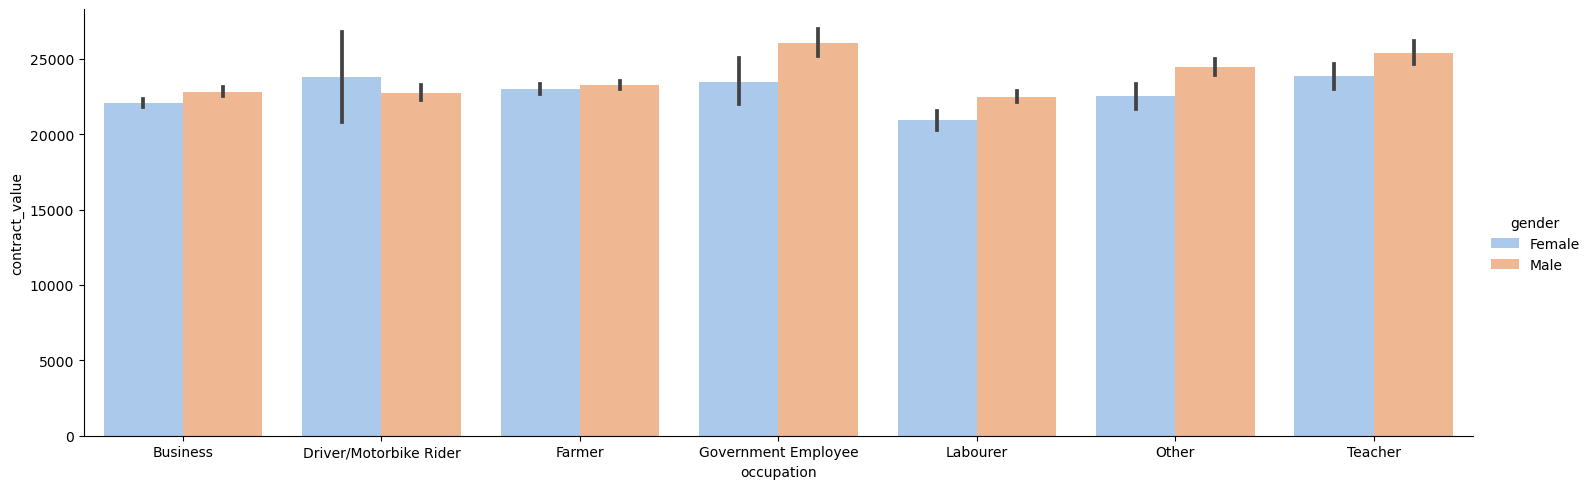

In [29]:
# before dropping any columns, let's do some correlation plots, to make sure we're not dropping anything of predictive value

# CONTRACT_VALUE against OCCUPATION and GENDER
sns.catplot(data=train_merged, x='occupation', y='contract_value', kind='bar', hue='gender', height=5, aspect=3)

In [30]:
# TERM against OCCUPATION and GENDER
sns.catplot(data=train_merged, x='occupation', y='term', kind='bar', hue='gender', height=5, aspect=3)

In [31]:
# TERM against CONTRACT_VALUE and OCCUPATION
sns.relplot(data=train_merged, x='contract_value', y='term', kind='scatter', hue='occupation')

In [32]:
# make a new column for the average monthly payment
means = []
for e in train_merged.payments_history:
  means.append(np.mean(e))

train_merged["average_monthly_payment"] = means
train_merged.head()

,transaction_dates,payments_history,month_1,month_2,month_3,month_4,month_5,month_6,registration_date,deposit,...,age,region,town,occupation,term,contract_value,expected_term_date,first_payment_date,last_payment_date,average_monthly_payment
contract_id,,,,,,,,,,,,,,,,,,,,,
ID_MR53LEX,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[3600.0, 750.0, 350.0, 65.0, 95.0, 135.0, 85.0...",880.0,930.0,495.0,715.0,220.0,385.0,2018-04-23 12:28:05,2500,...,NaN,Coast,Kwale,Teacher,556,33080.0,2019-10-31 12:28:05,2018-04-23 12:28:05,2021-05-26 17:14:45,517.258065
ID_3D7NQUH,"[2018-04-01 00:00:00, 2018-05-01 00:00:00, 201...","[2940.0, 970.0, 380.0, 880.0, 385.0, 440.0, 11...",660.0,935.0,935.0,825.0,770.0,935.0,2018-04-17 10:27:35,2500,...,26.0,South Rift,Narok,Farmer,556,33080.0,2019-10-25 10:27:35,2018-04-17 10:27:35,2021-05-26 16:54:53,737.866667
ID_0IWQNPI,"[2020-02-01 00:00:00, 2020-03-01 00:00:00, 202...","[2850.0, 1500.0, 1350.0, 610.0, 200.0, 250.0]",700.0,1350.0,1550.0,1400.0,1450.0,1200.0,2020-02-18 14:23:44,2400,...,21.0,Mount Kenya,Embu,Business,240,14400.0,2020-10-15 14:23:44,2020-02-18 14:23:48,2021-01-25 18:46:20,1126.666667
ID_IY8SYB9,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2200.0, 1420.0, 1180.0, 900.0, 1400.0, 780.0,...",580.0,480.0,800.0,1260.0,1650.0,530.0,2017-09-14 11:07:40,2000,...,26.0,Mount Kenya,Meru,Farmer,364,16560.0,2018-09-13 11:07:40,2017-09-14 11:07:32,2018-12-20 16:50:39,1126.000000
ID_9XHL7VZ,"[2017-09-01 00:00:00, 2017-10-01 00:00:00, 201...","[2640.0, 910.0, 480.0, 280.0, 200.0, 180.0, 33...",40.0,440.0,460.0,360.0,80.0,330.0,2017-09-06 06:50:20,2000,...,27.0,North Rift,West Pokot,Farmer,364,16560.0,2018-09-05 06:50:20,2017-09-06 06:50:16,2021-05-12 14:50:01,353.590909


In [33]:
# would be nice to expand this because there's a lot of overlapping data points

# AVERAGE_MONTHLY_PAYMENT against CONTRACT_VALUE and TERM
sns.relplot(data=train_merged, x='contract_value', y='average_monthly_payment', kind='scatter', hue='term')

In [34]:
# CONTRACT_VALUE by REGION
sns.catplot(data=train_merged, x='contract_value', y='region', kind='bar')

In [35]:
# CONTRACT_VALUE by REGION and GENDER
sns.catplot(data=train_merged, x='contract_value', y='region', kind='bar', hue='gender')

In [36]:
# CONTRACT_VALUE by REGION and OCCUPATION
# don't know if the colour makes this a bit confusing
sns.relplot(data=train_merged, x='region', y='occupation', kind='scatter', hue='contract_value', aspect=2)

In [37]:
# make a new column for the max and min monthly payments
max = []
min = []
for e in train_merged.payments_history:
  max.append(np.max(e))
  min.append(np.min(e))

train_merged["max_monthly_payment"] = max
train_merged["min_monthly_payment"] = min

In [38]:
# MAX_MONTHLY_PAYMENT by CONTRACT_VALUE and REGION
sns.relplot(data=train_merged, x='contract_value', y='max_monthly_payment', col='region')

In [39]:
# don't recommend running this - it took at least 10 minutes to generate and there's just too much data
sns.pairplot(data=train_merged, hue='gender')

In [40]:
# trying to do it without month 1-6, transaction_dates, or payment_history, or any other categorical variables
sns.pairplot(data=train_merged, hue='gender', x_vars=['deposit','accessory_rate', 'rate_per_unit', 'days_on_deposit', 'term', 'contract_value', 
                                                      'average_monthly_payment', 'max_monthly_payment', 'min_monthly_payment'], y_vars=['deposit','accessory_rate', 
                                                      'rate_per_unit', 'days_on_deposit', 'age', 'term', 'contract_value', 'average_monthly_payment', 'max_monthly_payment', 'min_monthly_payment'])

In [41]:
# # dropping extra columns
# train_merged.drop(columns=["RegistrationDate","Town","SupplierName","Term","TotalContractValue","ExpectedTermDate",
#                            "FirstPaymentDate","LastPaymentDate","Deposit","UpsellDate",
#                           "AccessoryRate","PaymentMethod","rateTypeEntity","RatePerUnit",
#                           "DaysOnDeposit","MainApplicantGender"],inplace=True)
# train_merged.head()

In [42]:
# # making new columns for mean payment
# mean_payment = []

# for i in range(0,train_merged.shape[0]):
#     payments = train_merged["payments_history"][i]
#     mean = np.mean(payments)
#     mean_payment.append(mean)

# train_merged["mean_payment"]=mean_payment

In [43]:
# # making 2 new columns for max and min payments
# max_payment = []

# for i in range(0,train_merged.shape[0]):
#     payments = train_merged["payments_history"][i]
#     maxi = np.max(payments)
#     max_payment.append(maxi)

# train_merged["max_payment"]=max_payment

# min_payment = []

# for i in range(0,train_merged.shape[0]):
#     payments = train_merged["payments_history"][i]
#     mini = np.min(payments)
#     min_payment.append(mini)

# train_merged["min_payment"]=min_payment

# train_merged.head()